<a href="https://colab.research.google.com/github/princepooorna/MachineLearning_A_Z/blob/master/LogisticPending.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

fun = files.upload()

Saving credit.csv to credit.csv


In [4]:
import io

data = pd.read_csv(io.StringIO(fun['credit.csv'].decode('utf-8')))

print(data.head())

  checking_status  duration                    credit_history  \
0            '<0'         6  'critical/other existing credit'   
1      '0<=X<200'        48                   'existing paid'   
2   'no checking'        12  'critical/other existing credit'   
3            '<0'        42                   'existing paid'   
4            '<0'        24              'delayed previously'   

               purpose  credit_amount      savings_status employment  \
0             radio/tv           1169  'no known savings'      '>=7'   
1             radio/tv           5951              '<100'   '1<=X<4'   
2            education           2096              '<100'   '4<=X<7'   
3  furniture/equipment           7882              '<100'   '4<=X<7'   
4            'new car'           4870              '<100'   '1<=X<4'   

   installment_commitment       personal_status other_parties  ...   \
0                       4         'male single'          none  ...    
1                       2  'female

In [5]:
p = data['checking_status'].unique()
j = 0
for i in p:
  data.checking_status[data.checking_status == i] = j
  j+=1

print(data.checking_status.head())


0    0
1    1
2    2
3    0
4    0
Name: checking_status, dtype: object


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [6]:
data.replace(data['credit_history'].unique(),value=[1,2,3,4,5],inplace=True)

print(data['credit_history'].head())


0    1
1    2
2    1
3    2
4    3
Name: credit_history, dtype: int64


In [7]:
X = data.iloc[:,[0,1,2,4,5,6,7,8,10,14,15,16,17,18,19]]
print(X.head())

   checking_status  duration  credit_history  credit_amount  \
0                0         6               1           1169   
1                1        48               2           5951   
2                2        12               1           2096   
3                0        42               2           7882   
4                0        24               3           4870   

       savings_status employment  installment_commitment  \
0  'no known savings'      '>=7'                       4   
1              '<100'   '1<=X<4'                       2   
2              '<100'   '4<=X<7'                       2   
3              '<100'   '4<=X<7'                       2   
4              '<100'   '1<=X<4'                       3   

        personal_status  residence_since     housing  existing_credits  \
0         'male single'                4         own                 2   
1  'female div/dep/mar'                2         own                 1   
2         'male single'               

In [8]:
X['foreign_worker'].replace(X['foreign_worker'].unique(),value=range(len(X['foreign_worker'].unique())),inplace=True)
print(X['foreign_worker'].head())



0    0
1    0
2    0
3    0
4    0
Name: foreign_worker, dtype: int64


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [9]:
for i in list(X):
  
  X[i].replace(X[i].unique(),value=range(len(X[i].unique())),inplace=True)
  print(X[i].head())


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


0    0
1    1
2    2
3    0
4    0
Name: checking_status, dtype: int64
0    0
1    1
2    2
3    3
4    4
Name: duration, dtype: int64
0    0
1    1
2    0
3    1
4    2
Name: credit_history, dtype: int64
0    0
1    1
2    2
3    3
4    4
Name: credit_amount, dtype: int64
0    0
1    1
2    1
3    1
4    1
Name: savings_status, dtype: int64
0    0
1    1
2    2
3    2
4    1
Name: employment, dtype: int64
0    0
1    1
2    1
3    1
4    2
Name: installment_commitment, dtype: int64
0    0
1    1
2    0
3    0
4    0
Name: personal_status, dtype: int64
0    0
1    1
2    2
3    0
4    0
Name: residence_since, dtype: int64
0    0
1    0
2    0
3    1
4    1
Name: housing, dtype: int64
0    0
1    1
2    1
3    1
4    0
Name: existing_credits, dtype: int64
0    0
1    0
2    1
3    0
4    0
Name: job, dtype: int64
0    0
1    0
2    1
3    1
4    1
Name: num_dependents, dtype: int64
0    0
1    1
2    1
3    1
4    1
Name: own_telephone, dtype: int64
0    0
1    0
2    0
3    0
4    0
Na

In [10]:
Y = data.iloc[:,20]
Y.replace([0,1],[1,0],inplace=True)
print(Y.head())

0    good
1     bad
2    good
3    good
4     bad
Name: class, dtype: object


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=0)
print(len(x_train),len(x_test))

700 300


In [12]:
rgssr = LogisticRegression()
rgssr.fit(x_train,y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
# f, ax = plt.subplots(figsize=(8, 6))
# contour = ax.contourf(x_train[''], y_train, probs, 25, cmap="RdBu",
#                       vmin=0, vmax=1)
# ax_c = f.colorbar(contour)
# ax_c.set_label("Checks")
# ax_c.set_ticks([0, .25, .5, .75, 1])

# ax.scatter(X[100:,0], X[100:, 1], c=y[100:], s=50,
#            cmap="RdBu", vmin=-.2, vmax=1.2,
#            edgecolor="white", linewidth=1)

# ax.set(aspect="equal",
#        xlim=(-5, 5), ylim=(-5, 5),
#        xlabel="$X_1$", ylabel="$X_2$")

In [14]:
y_pred = rgssr.predict(x_test)
print(y_pred[:5],y_test.head())
# print(y_train.head())


['bad' 'good' 'good' 'good' 'good'] 993    good
859    good
298    good
553    good
672    good
Name: class, dtype: object


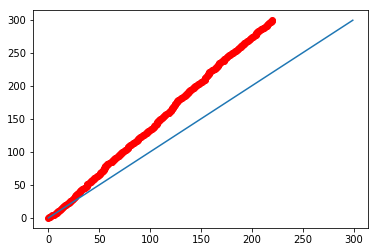

In [15]:
n = []
m = 0
k = 0
l = []
for j in range(len(y_test)):
  if y_pred[j] == y_test.iloc[j]:
    m += 1
  n.append(m)
  l.append(k)
  k += 1
plt.plot(n,l,'ro')
plt.plot(l,l)
plt.show()



In [18]:
print(m/k)

0.7333333333333333


In [0]:
#The prediction is 73.33% accurate